# Remote demo

In [1]:
# local machine only
import sys
sys.path.append('/home/bp/devel/mupif.git')
import matplotlib
sys.path.append('.')
import models
import mupif as mp

13:13:03 [1327|MainThread] WARNING:logger.py:211 UnitsWarning: 'W/m/K' contains multiple slashes, which is discouraged by the FITS standard


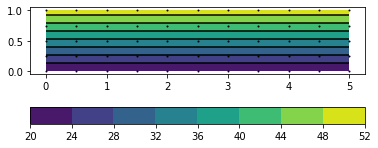

In [2]:
thermalSolver = models.ThermalModel()
thermalSolver.initialize()
bc1 = mp.ConstantProperty(propID=mp.DataID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(50,), unit=mp.U['K'])
bc2 = mp.ConstantProperty(propID=mp.DataID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(20,), unit=mp.U['K'])
#thermalSolver.set(bc1, 'Cauchy top')
thermalSolver.set(bc1, 'Dirichlet top')
thermalSolver.set(bc2, 'Dirichlet bottom')
# solve 
thermalSolver.solveStep(mp.TimeStep(time=0,dt=.1,targetTime=1.,unit=mp.U.s))
# show the field
ft1=thermalSolver.get(mp.DataID.FID_Temperature,time=1.*mp.Q.s)
ft1.plot2D()

NS listing: {'Pyro.NameServer': 'PYRO:Pyro.NameServer@0.0.0.0:10000', 'CVUT.demo01': 'PYRO:obj_f687f8207304424f888dadfca7d9f1cb@172.24.1.1:34274', 'mupif.scheduler': 'PYRO:obj_4a6f57160afe4911b57c64e31527b503@172.24.1.1:36000', 'MuPIF.Example.Thermal_stat': 'PYRO:obj_40371edc51e74e30bca9229e9f62b175@172.24.1.1:34676', 'MuPIF.Example.Thermal_nonstat': 'PYRO:obj_b7eb325ef7d34f01877d26d244ff2aa0@172.24.1.1:34728', 'MuPIF.Example.Mechanical': 'PYRO:obj_8c11e215756c4b4d8c088dfab8ea5559@172.24.1.1:60690'}
[]
Mechanical-demo-solver, ver 1.0
JobManStatus: [{'key': '10@MuPIF.Example.Mechanical', 'running': 0.13638091087341309, 'user': 'bp@DESKTOP-OR23MFG', 'uri': <Pyro5.core.URI at 0x7fad0f9c8850; PYRO:obj_e3f6dafdee424c6fb73bb41a17f4b745@172.24.1.1:35448>}]


100%|██████████| 160/160 [00:00<00:00, 10384.19 cells/s]


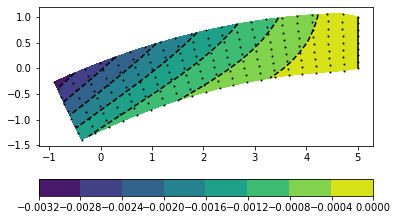

In [3]:
# remote model
import os
os.environ ['MUPIF_NS'] = '172.24.1.1:10000' # ns lookup path; requires vpn connection to test 
# connect to nameserve
ns=mp.pyroutil.connectNameserver()
# print registry
print("NS listing:", ns.list())

# connect to mechanical model jobmanager
jobman=mp.pyroutil.connectJobManager(ns=ns, jobManName='MuPIF.Example.Mechanical')
print(jobman.getStatus())
#jobman.terminateAllJobs()
# allocate model instance; returns remote model proxy
ms = mp.pyroutil.allocateApplicationWithJobManager(ns=ns, jobMan=jobman)
# work with proxy as with local instance
ms.initialize()
print(ms)
print(ms.getApplicationSignature())
print("JobManStatus:", jobman.getStatus())


bc1 = mp.ConstantProperty(propID=mp.DataID.FID_Displacement, valueType=mp.ValueType.Scalar, value=(0,0), unit=mp.U['m'])
ms.set(bc1, 'Dirichlet right')

ms.set(ft1)
ms.solveStep(mp.TimeStep(time=0,dt=.1,targetTime=1.,unit=mp.U.s))
fd2=ms.get(mp.DataID.FID_Displacement,time=1.*mp.Q.s)
fd2.plot2D(warpField=fd2, warpScale=3.e2)

ms.terminate()